In [330]:
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame

In [331]:
# Methods for plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(data: DataFrame, x_col, y_col):
    plt.scatter(data[x_col], data[y_col])
    plt.show()
    
def plot_histogram(data: DataFrame, column):
    sns.displot(data=data,x=column,kde=True)
    plt.show()

def create_heatmap_mask(corr_data: DataFrame):
    corr_mask = np.zeros_like(corr_data)
    corr_mask[np.triu_indices_from(corr_mask)] = True
    return corr_mask

In [332]:
liver_df = pd.read_csv('Data/liver_disease_1.csv')

print(f'The datatset contains {len(liver_df)} records.')
print(f'The dataset can be described as \n{liver_df.describe()}')
print(f'The dataset has following columns: \n{liver_df.columns}')

The datatset contains 583 records.
The dataset can be described as 
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.48

In [333]:
# Convert Categorical data into numerical
liver_df['Dataset'] = liver_df['Dataset'].replace('Yes', 1).replace('No',0)
liver_df.head(20)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1


The following NaN values are present in the dataset: 
Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64
The following null values are present in the dataset: 
Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64
Albumin_and_Globulin_Ratio column contains 4 null/NaN values which comprises 0.686% of the data set and hence can be removed.
******************************Albumin_and_Globulin_Ratio******************************
For column A

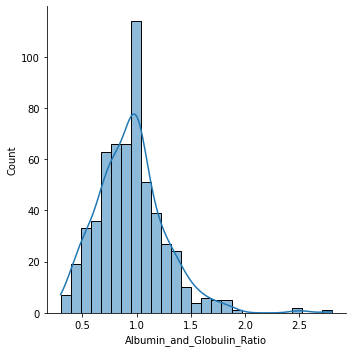

Replaced NaNs with mean value.
After cleaning:
For column Albumin_and_Globulin_Ratio, the mean is 0.9470639032815198 and the median is 0.9470639032815197. The skewness of the column is 0.9957034104499916


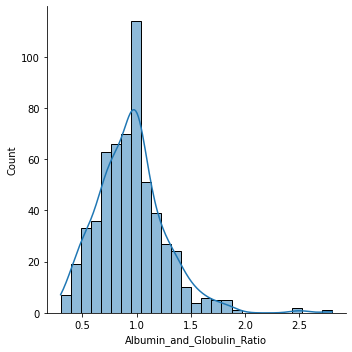

**************************************************************************************


In [334]:
# check for NaN and null values
print(f'The following NaN values are present in the dataset: \n{np.isnan(liver_df).sum()}')
print(f'The following null values are present in the dataset: \n{liver_df.isnull().sum()}')

print(f'Albumin_and_Globulin_Ratio column contains 4 null/NaN values which comprises {round(4/len(liver_df)*100,3)}% of the data set and hence can be removed.')

# # Remove NaN/Null values
# liver_df= liver_df.dropna(axis=0,how='any')
# print(f'The dataset after dropping all null and NaN values contains {len(liver_df)}\n{liver_df.head()}')
# liver_df = liver_df.drop_duplicates()

# Alternatively we could replace the null/NaN values with mean or median 
def analyze_skewness(data: DataFrame, column: str):
    mean = data[column].mean()
    median = data[column].median()
    skewness = data[column].skew()
    print(f'For column {column}, the mean is {mean} and the median is {median}. The skewness of the column is {skewness}')    
    return mean, median, skewness

print(f'******************************Albumin_and_Globulin_Ratio******************************')
mean, median, skewness = analyze_skewness(liver_df, 'Albumin_and_Globulin_Ratio')  
plot_histogram(liver_df,'Albumin_and_Globulin_Ratio') 
# to decide whether to replace with mean or median we need to check the skewness of the column
# if the 'Albumin_and_Globulin_Ratio' is heavily right or left skewed we shall be replacing 0s with median, else mean
if skewness > 1 or skewness < -1:
    print(f'Replaced NaNs with median value.')
    liver_df['Albumin_and_Globulin_Ratio'] = liver_df['Albumin_and_Globulin_Ratio'].replace(np.NAN, median)
else:
    print(f'Replaced NaNs with mean value.') 
    liver_df['Albumin_and_Globulin_Ratio'] = liver_df['Albumin_and_Globulin_Ratio'].replace(np.NAN, mean)    
print('After cleaning:')
mean, median, skewness = analyze_skewness(liver_df, 'Albumin_and_Globulin_Ratio') 
plot_histogram(liver_df,'Albumin_and_Globulin_Ratio') 
print(f'**************************************************************************************')


In [335]:
# Standardise data
from sklearn.preprocessing import StandardScaler

liver_df_predictors = liver_df[[col for col in list(liver_df.columns) if col != 'Dataset']]
liver_df_target = liver_df['Dataset']

scale = StandardScaler()

# Scale the Predictors 
scale.fit(liver_df_predictors)
cols = liver_df_predictors.columns
liver_df_predictors = pd.DataFrame(data=scale.transform(liver_df_predictors), columns=cols)

# The Target column is already in the range of 0 to 1 so it will not require scaling. 
# Add back outcome to scaled dataset
liver_df_prepared_scaled = liver_df_predictors.assign(Outcome=liver_df_target)
liver_df_prepared_scaled= liver_df_prepared_scaled.dropna(axis=0,how='any')
liver_df_prepared_scaled.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898,1
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697,1
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323,1
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351,1
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144,1


<AxesSubplot:>

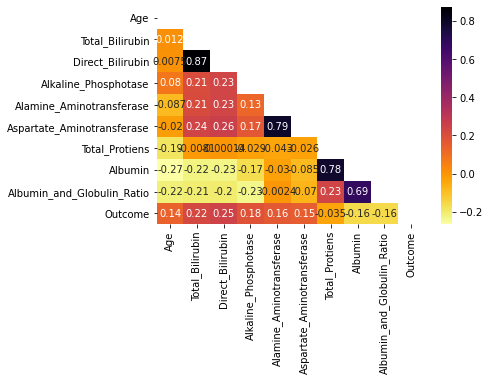

In [336]:
# Correlation analysis using Pearson's correlation & rudimentary dimensionality reduction
def correlation_coefficients(data: DataFrame): return data.corr(method='pearson')

corr = correlation_coefficients(liver_df_prepared_scaled)
corr_mask = create_heatmap_mask(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='inferno_r', mask=corr_mask)

#### We can see that the highest correlation between target and predictiors is exhibited by the *Direct_Bilirubin* column. 
- *Direct_Bilirubin* and *Total_Bilirubin* also exhibit high degree of colliniearity, but both these column exhibit the highest correlation with the target hence we keep both.  
- *Aspartate_Aminotransferase* and *Alamine_Aminotransferase* also exhibit high degree of collinearity, we can remove *Aspartate_Aminotransferase* since it exhibits lows correlation as compared to the rest. 
- *Albumin* and *Total_Protiens* also exhibit high collinearity and *Total_Protiens* exhibits lowest correlations with the target and can be removed. 

In [337]:
print(f'The columns are {liver_df_prepared_scaled.columns}')
liver_df_prepared_scaled = liver_df_prepared_scaled.drop(labels=['Aspartate_Aminotransferase','Total_Protiens'],axis=1)
liver_df_prepared_scaled.head(25)

The columns are Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Outcome'],
      dtype='object')


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,0.198969,-0.147898,1
1,1.066637,1.225171,1.430423,1.682629,-0.091599,0.073157,-0.650697,1
2,1.066637,0.644919,0.931508,0.821588,-0.113522,0.198969,-0.179323,1
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,0.324781,0.166351,1
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.933340,-1.719144,1
5,0.077514,-0.241578,-0.280143,-0.340199,-0.338224,1.582902,1.109099,1
6,-1.158890,-0.386642,-0.458327,-0.562669,-0.354665,0.450593,0.166351,1
7,-0.973430,-0.386642,-0.422690,-0.364918,-0.365626,0.576405,0.480601,1
8,-1.715272,-0.386642,-0.422690,-0.364918,-0.321782,1.205465,0.794850,0
9,0.633896,-0.418878,-0.458327,-0.002374,-0.151885,0.324781,0.166351,1


In [463]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

predictors, target = liver_df_prepared_scaled[[col for col in list(liver_df_prepared_scaled.columns) if col != 'Outcome']], liver_df_prepared_scaled['Outcome']

X_Train, X_Test,Y_Train, Y_Test = train_test_split(predictors, target, train_size=0.96, random_state=3, stratify=target)
print(f'The shape of training Predictor set is {X_Train.shape}.')
print(f'The shape of test Predictor set is {X_Test.shape}.')
print(f'The shape of training Target set is {Y_Train.shape}.')
print(f'The shape of test Target set is {Y_Test.shape}.')

The shape of training Predictor set is (559, 7).
The shape of test Predictor set is (24, 7).
The shape of training Target set is (559,).
The shape of test Target set is (24,).


### Create Naive Bayes classifier model

In [464]:
def calculate_err_rate(actual, expected):
    err = 0
    for i in range(0, len(actual)):
        if actual.take(i) != expected.iloc[i]:
            err += 1
    return err/len(actual)

### Gaussian 

In [465]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(X_Train, Y_Train)

predicted = model.predict(X_Test)

acc = metrics.accuracy_score(Y_Test, predicted)
f1_score = metrics.f1_score(Y_Test, predicted)
err = calculate_err_rate(predicted,Y_Test)

print(f'Accuracy: {acc}\nf1 score: {f1_score}\nerror rate: {err}')
print(f'Accuracy of training set: {model.score(X_Train,Y_Train)}')

Accuracy: 0.5833333333333334
f1 score: 0.5833333333333334
error rate: 0.4166666666666667
Accuracy of training set: 0.556350626118068


The number of True Positive are 7.
The number of True Negative are 7.
The number of False Positive are 0.
The number of False Negative are 10.
Sum: 24


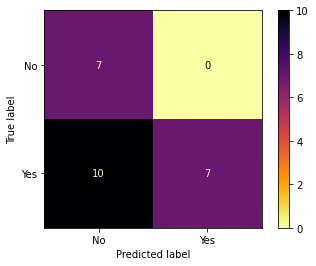

In [466]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_Test,predicted).ravel()
print(f'The number of True Positive are {tp}.')
print(f'The number of True Negative are {tn}.')
print(f'The number of False Positive are {fp}.')
print(f'The number of False Negative are {fn}.')
print(f'Sum: {tp+tn+fp+fn}')
disp = plot_confusion_matrix(model, X_Test, Y_Test,display_labels=['No', 'Yes'],cmap=plt.cm.inferno_r)
plt.show()

### Bernoulli

In [467]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

model = BernoulliNB(binarize=0.74,fit_prior=True)
model.fit(X_Train, Y_Train)

predicted = model.predict(X_Test)

acc = metrics.accuracy_score(Y_Test, predicted)
f1_score = metrics.f1_score(Y_Test, predicted)
err = calculate_err_rate(predicted,Y_Test)

print(f'Accuracy: {acc}\nf1 score: {f1_score}\nerror rate: {err}')
print(f'Accuracy of training set: {model.score(X_Train,Y_Train)}')

Accuracy: 0.75
f1 score: 0.8235294117647058
error rate: 0.25
Accuracy of training set: 0.7012522361359571


The number of True Positive are 14.
The number of True Negative are 4.
The number of False Positive are 3.
The number of False Negative are 3.
Sum: 24


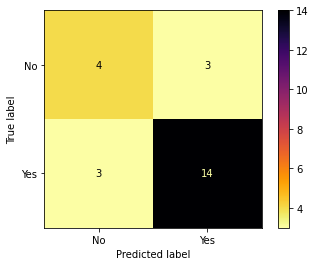

In [468]:
tn, fp, fn, tp = confusion_matrix(Y_Test,predicted).ravel()
print(f'The number of True Positive are {tp}.')
print(f'The number of True Negative are {tn}.')
print(f'The number of False Positive are {fp}.')
print(f'The number of False Negative are {fn}.')
print(f'Sum: {tp+tn+fp+fn}')
disp = plot_confusion_matrix(model, X_Test, Y_Test,display_labels=['No', 'Yes'],cmap=plt.cm.inferno_r)
plt.show()

### Create Logistic Regression model

In [469]:
predictors, target = liver_df_prepared_scaled[[col for col in list(liver_df_prepared_scaled.columns) if col != 'Outcome']], liver_df_prepared_scaled['Outcome']
X_Train, X_Test,Y_Train, Y_Test = train_test_split(predictors, target, train_size=0.96, random_state=3, stratify=target)
print(f'The shape of training Predictor set is {X_Train.shape}.')
print(f'The shape of test Predictor set is {X_Test.shape}.')
print(f'The shape of training Target set is {Y_Train.shape}.')
print(f'The shape of test Target set is {Y_Test.shape}.')

The shape of training Predictor set is (559, 7).
The shape of test Predictor set is (24, 7).
The shape of training Target set is (559,).
The shape of test Target set is (24,).


In [470]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train,Y_Train)

predicted = model.predict(X_Test)

acc = metrics.accuracy_score(Y_Test, predicted)
f1_score = metrics.f1_score(Y_Test, predicted)
err = calculate_err_rate(predicted,Y_Test)

print(f'Accuracy: {acc}\nf1 score: {f1_score}\nerror rate: {err}')
print(f'Accuracy of training set: {model.score(X_Train,Y_Train)}')


Accuracy: 0.9166666666666666
f1 score: 0.9411764705882353
error rate: 0.08333333333333333
Accuracy of training set: 0.7137745974955277


The number of True Positive are 16.
The number of True Negative are 6.
The number of False Positive are 1.
The number of False Negative are 1.
Sum: 24


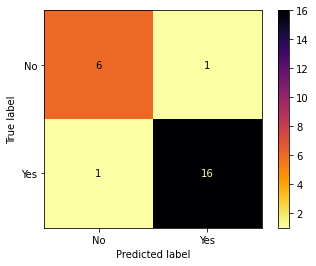

In [471]:
tn, fp, fn, tp = confusion_matrix(Y_Test,predicted).ravel()
print(f'The number of True Positive are {tp}.')
print(f'The number of True Negative are {tn}.')
print(f'The number of False Positive are {fp}.')
print(f'The number of False Negative are {fn}.')
print(f'Sum: {tp+tn+fp+fn}')
disp = plot_confusion_matrix(model, X_Test, Y_Test,display_labels=['No', 'Yes'],cmap=plt.cm.inferno_r)
plt.show()

#### Out of all the models used, the best accuracy is exhibited by the **Logistic Regression** model. The **Naive Bayes** models (**Gaussian** & **Bernouli**) do not perform as well as the **Logistic regression** model. The **Gaussian** model shows the worst performance, the **Bernoulli** model tries to binarize numerical data into bins (it can only work on binary vectors) and then fit the data. Based on the confusion matrix generated for all 3 models, **Logistic Regression** model exhibits the lowest occurence of *False Positive/Negatives*. 